In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('petrol_consumption.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],
                                                    df.iloc[:, -1],
                                                    test_size=0.3,
                                                    random_state=42)

In [5]:
dtc = DecisionTreeRegressor(random_state=42)

In [6]:
dtc.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [7]:
y_pred = dtc.predict(X_test)

In [8]:
mean_squared_error(y_test, y_pred, squared=False)

87.96514461232168

In [9]:
dtc.tree_.max_depth

11

[Text(725.6968085106383, 520.95, 'X[3] <= 0.667\nmse = 8211.961\nsamples = 33\nvalue = 581.091'),
 Text(596.5851063829788, 475.65000000000003, 'X[1] <= 4745.0\nmse = 4594.957\nsamples = 31\nvalue = 565.452'),
 Text(395.34893617021277, 430.35, 'X[0] <= 7.5\nmse = 3623.382\nsamples = 25\nvalue = 584.24'),
 Text(182.8340425531915, 385.05, 'X[2] <= 5652.5\nmse = 3785.168\nsamples = 14\nvalue = 608.786'),
 Text(75.98297872340426, 339.75, 'X[1] <= 4007.0\nmse = 1916.188\nsamples = 4\nvalue = 663.75'),
 Text(37.99148936170213, 294.45, 'X[2] <= 4355.0\nmse = 56.25\nsamples = 2\nvalue = 706.5'),
 Text(18.995744680851065, 249.14999999999998, 'mse = 0.0\nsamples = 1\nvalue = 699.0'),
 Text(56.9872340425532, 249.14999999999998, 'mse = 0.0\nsamples = 1\nvalue = 714.0'),
 Text(113.9744680851064, 294.45, 'X[3] <= 0.613\nmse = 121.0\nsamples = 2\nvalue = 621.0'),
 Text(94.97872340425532, 249.14999999999998, 'mse = 0.0\nsamples = 1\nvalue = 632.0'),
 Text(132.97021276595746, 249.14999999999998, 'mse = 

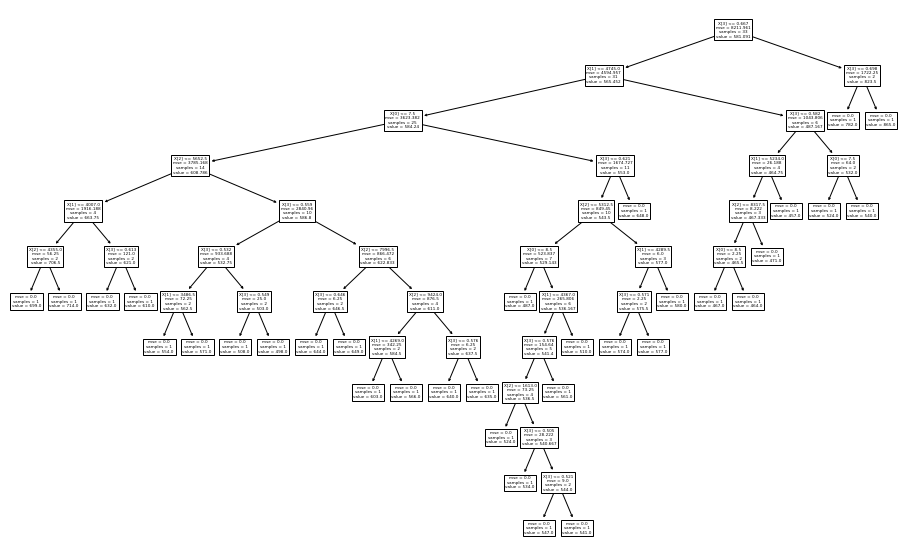

In [16]:
plt.figure(figsize=(16,10))
tree.plot_tree(dtc)